## ![BTS](img/Logo-BTS.jpg)

# Session 21: Sentiment Analysis

### Juan Luis Cano Rodríguez <juan.cano@bts.tech> - Data Science Foundations (2018-12-11)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Juanlu001/bts-mbds-data-science-foundations/blob/master/sessions/21-Sentiment-Analysis.ipynb)

## Extra: scikit-learn helpers

There are several libraries that provide higher level tools to evaluate and visualize scikit-learn models, for example:

* https://github.com/reiinakano/scikit-plot
* https://github.com/DistrictDataLabs/yellowbrick
* https://github.com/rasbt/mlxtend

Using the "astrological method" to rank popularity (that is, counting stars on GitHub) the top one is mlxtend. But using the "provides way to plot confusion matrix **with class names** automatically" metric, the best one is scikit-plot, which is the one we will use.

In [1]:
!pip install scikit-plot

## Exercise 1: Preprocessing

1. Download the "Large Movie Review Dataset" from http://ai.stanford.edu/~amaas/data/sentiment/
2. Read all the text files from `aclImdb/train/pos/` and `aclImdb/train/neg/` into a pandas DataFrame called `train` with two columns: `review` (the text itself) and `sentiment` (`positive` or `negative`) (_Hint: Use the `glob` module_)

<table class="dataframe" border="1">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>review</th>
      <th>sentiment</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Today's sci-fi thrillers are more like Rambo i...</td>
      <td>positive</td>
    </tr>
    <tr>
      <th>1</th>
      <td>I had the pleasure of seeing this film at the ...</td>
      <td>positive</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Deliriously romantic comedy with intertwining ...</td>
      <td>positive</td>
    </tr>
    <tr>
      <th>3</th>
      <td>This movie is a fantastic movie. Everything ab...</td>
      <td>positive</td>
    </tr>
    <tr>
      <th>4</th>
      <td>The documentary begins with setting the perspe...</td>
      <td>positive</td>
    </tr>
  </tbody>
</table>

3. Do the same thing with `data_test`
4. Create a `TfidfVectorizer` with:
  * a _preprocessing_ step that removes the spurious `<br />` tags from the text,
  * a _tokenizing_ step that uses Spacy to lemmatize the words, and
  * its list of `stop_words` coming from Spacy

(_Hint:_ https://scikit-learn.org/stable/modules/feature_extraction.html#customizing-the-vectorizer-classes)

In [4]:
import tarfile

In [20]:
import pandas as pd

In [9]:
tarfile.open("data/aclImdb_v1.tar.gz").extractall("data/imdb_tgz/")

In [12]:
import glob

In [23]:
texts = []
for file_path in glob.glob("data/aclImdb/train/pos/*.txt"):
    with open(file_path, encoding='utf8') as fp:
        texts.append(fp.read())

train_positive = pd.DataFrame({
    'reviews': texts,
    'sentiment': 'positive',
})

In [24]:
texts = []
for file_path in glob.glob("data/aclImdb/train/neg/*.txt"):
    with open(file_path, encoding='utf8') as fp:
        texts.append(fp.read())

train_negative = pd.DataFrame({
    'reviews': texts,
    'sentiment': 'negative',
})

In [190]:
train = pd.concat([train_positive, train_negative]).reset_index(drop=True)
train["reviews"] = train["reviews"].str.replace("<br />", ' ')

In [34]:
texts = []
for file_path in glob.glob("data/aclImdb/test/pos/*.txt"):
    with open(file_path, encoding='utf8') as fp:
        texts.append(fp.read())

test_positive = pd.DataFrame({
    'reviews': texts,
    'sentiment': 'positive',
})

In [35]:
texts = []
for file_path in glob.glob("data/aclImdb/test/neg/*.txt"):
    with open(file_path, encoding='utf8') as fp:
        texts.append(fp.read())

test_negative = pd.DataFrame({
    'reviews': texts,
    'sentiment': 'negative',
})

In [191]:
test = pd.concat([test_positive, test_negative]).reset_index(drop=True)
test["reviews"] = test["reviews"].str.replace("<br />", ' ')

In [37]:
import spacy

In [38]:
nlp = spacy.load("en_core_web_sm")

In [192]:
train.loc[10, 'reviews']

"OK where do i begin?... This movie changed my life! The plot was seamless. James Cahill has out done himself. Initially after a first viewing i was disappointed that i hadn't seen it on the silver screen. However this was before exploring the DVD's many features!!!! Oh my god Jakes Cahill's commentary of the film was almost as flawless as his acting. he told of industry secrets used in the film that you only get with experience.  I was so impressed by the other actors. The scene where the security guard is talking to the girl in the hallway, reminded me of some of my favorite blue (pornographic) movies. I am certainly with Gangsta when he expresses his disappointment with no sequel.  I am still blown away with each viewing of the martial arts skills involved, matched only by the sign indicating the location of the library at the school... and possibly the guy playing a retard! All in all a timeless classic and the best film to come out of Europe in years! where my Oscars at dawn!!!!!!

In [118]:
from spacy.lang.en import STOP_WORDS

In [120]:
def tokenize(text):
    doc = nlp(text)
    return [
        token.lemma_ for token in doc
        if not token.is_punct
        and not token.is_space
        and not token.tag_ == "POS"
        and not token.lower_ in STOP_WORDS
    ]

In [121]:
def preprocess(text):
    return text.replace('<br />', ' ')

In [123]:
print(tokenize(preprocess(train_positive.loc[10, 'reviews'])))

['ok', 'begin', 'movie', 'change', 'life', 'plot', 'seamless', 'james', 'cahill', 'initially', 'view', 'disappointed', 'not', 'see', 'silver', 'screen', 'explore', 'dvd', 'feature', 'oh', 'god', 'jakes', 'cahill', 'commentary', 'film', 'flawless', 'acting', 'tell', 'industry', 'secret', 'film', 'experience', 'impressed', 'actor', 'scene', 'security', 'guard', 'talk', 'girl', 'hallway', 'remind', 'favorite', 'blue', 'pornographic', 'movie', 'certainly', 'gangsta', 'express', 'disappointment', 'sequel', 'blow', 'away', 'viewing', 'martial', 'art', 'skill', 'involve', 'match', 'sign', 'indicate', 'location', 'library', 'school', 'possibly', 'guy', 'play', 'retard', 'timeless', 'classic', 'good', 'film', 'come', 'europe', 'year', 'oscars', 'dawn']


In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [187]:
slow_vect = TfidfVectorizer(
    tokenizer=tokenize,
)
#vect = CountVectorizer()

In [197]:
fast_vect = TfidfVectorizer(
    stop_words=STOP_WORDS,
)

In [188]:
%timeit slow_vect.fit_transform(train_positive.loc[:10, 'reviews'])

726 ms ± 80.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [189]:
%timeit fast_vect.fit_transform(train_positive.loc[:10, 'reviews'])

4.45 ms ± 121 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [198]:
X = fast_vect.fit_transform(train_positive.loc[:5, 'reviews'])
X

<6x335 sparse matrix of type '<class 'numpy.float64'>'
	with 376 stored elements in Compressed Sparse Row format>

In [199]:
X.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.12084247, 0.        , 0.        , ..., 0.        , 0.        ,
        0.12084247],
       [0.        , 0.09044619, 0.09044619, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.07624698,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.10936726, 0.        ,
        0.        ]])

In [201]:
print(vect.get_feature_names()[:10])

['"moonstruck', '1/2', '10', '14', '15', '17', '1945,film', '1950', '1975', '1990']


## Exercise 2: Single model

1. Apply the `TfidfVectorizer` to the train data and fit a `LogisticRegression` model
2. What is the accuracy?
3. Use scikit-plot to plot the confusion matrix

### Option a)

In [248]:
fast_vect = TfidfVectorizer(
    stop_words=STOP_WORDS,
)

In [249]:
X_train = fast_vect.fit_transform(train['reviews'])

In [250]:
train_vocab = fast_vect.vocabulary_.keys()

In [251]:
X_test = fast_vect.fit_transform(test['reviews'])

In [252]:
test_vocab = fast_vect.vocabulary_.keys()

In [253]:
vocab = set(train_vocab) | set(test_vocab)

In [254]:
fast_vect_vocab = TfidfVectorizer(
    stop_words=STOP_WORDS,
    vocabulary=vocab,
)

In [255]:
X_train = fast_vect_vocab.fit_transform(train['reviews'])
X_train

<25000x101595 sparse matrix of type '<class 'numpy.float64'>'
	with 2193196 stored elements in Compressed Sparse Row format>

In [256]:
X_test = fast_vect_vocab.fit_transform(test['reviews'])
X_test

<25000x101595 sparse matrix of type '<class 'numpy.float64'>'
	with 2144717 stored elements in Compressed Sparse Row format>

In [229]:
y_train = train['sentiment']

In [231]:
y_test = test['sentiment']

### Option b)

In [259]:
data = pd.concat([train, test])

In [260]:
X = fast_vect.fit_transform(data['reviews'])
X

<50000x101595 sparse matrix of type '<class 'numpy.float64'>'
	with 4337913 stored elements in Compressed Sparse Row format>

In [261]:
from sklearn.model_selection import train_test_split

In [264]:
X_train, X_test, y_train, y_test = train_test_split(
    X, data['sentiment'], train_size=0.5, test_size=0.5,
)

In [265]:
X_train

<25000x101595 sparse matrix of type '<class 'numpy.float64'>'
	with 2171479 stored elements in Compressed Sparse Row format>

In [267]:
from sklearn.linear_model import LogisticRegression

In [268]:
model = LogisticRegression()

In [269]:
model.fit(X_train, y_train)

/home/juanlu/.miniconda36/envs/bts36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [270]:
y_pred = model.predict(X_test)

In [271]:
from sklearn.metrics import accuracy_score

In [272]:
accuracy_score(y_test, y_pred)

0.88688

In [307]:
import scikitplot as skplt

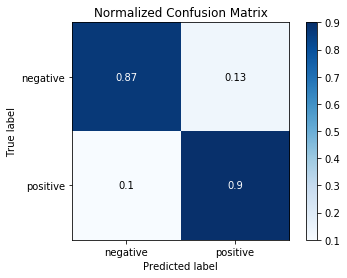

In [311]:
skplt.metrics.plot_confusion_matrix(
    y_test, y_pred, normalize=True,
);

In [274]:
model.predict(fast_vect_vocab.fit_transform([
    "This is the most awesome movie that I ever saw!"
]))

array(['positive'], dtype=object)

In [283]:
model.predict(fast_vect_vocab.fit_transform([
    "This is the worst movie that I ever saw!"
]))

array(['negative'], dtype=object)

In [293]:
model.classes_

array(['negative', 'positive'], dtype=object)

In [306]:
model.predict_proba(fast_vect_vocab.fit_transform([
    ""
]))

array([[0.509191, 0.490809]])

## Exercise 3: Cross validation

1. Concatenate `train` and `test` to produce `data`
2. Use the `sklearn.cross_validation.cross_val_score` with 5 splits to produce a list of accuracy scores. Are they uniform?
3. Use `scikitplot.estimators.plot_learning_curve` to plot the learning curves of our `LogisticRegression` model

## Exercise 4: Model selection

1. Use `GridSearchCV` to optimize the `C` hyperparameter of the `LogisticRegression`
2. Try different classifiers (like a `RandomForestClassifier`), compute their accuracy, try optimizing their hyperparameters

In [317]:
model = LogisticRegression(C=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8602

In [312]:
from sklearn.model_selection import GridSearchCV

In [319]:
gs = GridSearchCV(
    model, {'C': [0.01, 0.05, 0.25, 0.5, 1]}, cv=5, n_jobs=-1,
)
gs

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.01, 0.05, 0.25, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [322]:
y = data['sentiment']

In [323]:
gs.fit(X, y)

/home/juanlu/.miniconda36/envs/bts36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.01, 0.05, 0.25, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [324]:
gs.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)